In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2') 

In [3]:
file_path = 'test_news_2.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    document = file.read()

sentences = document.split('\n')

politics = sentences[:10] (10문장)

food = sentences[10:24] (14문장)

art = sentences[24:] (12문장) 

In [6]:
print(len(sentences))
print(len(sentences[:10]))
print(len(sentences[10:24]))
print(len(sentences[24:]))

36
10
14
12


In [7]:
# 비교 문장 (윈도우 크기 2)
window_2_list = [' '.join(sentences[i:i+2]) for i in range(len(sentences)-1)]

# 비교 문장 윈도우 3
window_3_list = [' '.join(sentences[i:i+3]) for i in range(len(sentences)-2)]

In [8]:
print(len(window_2_list))
print(len(window_3_list))

35
34


In [9]:
# 각 문장
sentences

['The US presidential election could be the foremost global risk, with anticipated effects extending more broadly and profoundly across global security, stability and economic outlook than any other event, according to a report.',
 'The biggest challenge in 2024 is the "United States versus itself," marked by the presidential election scheduled in November, Eurasia Group, a New York-based political risk consulting firm, said in its annual forecast report that listed the top 10 risks to the world this year.',
 '"The United States is already the world\'s most divided and dysfunctional advanced industrial democracy. The 2024 election will exacerbate this problem no matter who wins."',
 'The outcome of the election holds profound implications for the entire global population, comprising 8 billion people, yet the decisive influence rests in the hands of a mere 160 million Americans.',
 'The fate of the result is intricately intertwined with just tens of thousands of voters residing in speci

In [10]:
# 임베딩
ebd_a = model.encode(sentences)
ebd_b_2 = model.encode(window_2_list)
ebd_b_3 = model.encode(window_3_list)

In [11]:
# 1) ebd_a의 i+2번째와 ebd_b_2의 i번째 비교(len(ebd_a)-2)
similarities_2 = []
for i in range(len(ebd_a)-2):
    similarity_i_2 = cosine_similarity([ebd_b_2[i]], [ebd_a[i + 2]])[0][0]
    similarities_2.append(similarity_i_2)
    
# 2) ebd_a의 i+3번째와 ebd_b_2의 i번째 비교(len(ebd_a)-3)
similarities_3 = []
for i in range(len(ebd_a)-3):
    similarity_i_3 = cosine_similarity([ebd_b_3[i]], [ebd_a[i + 3]])[0][0]
    similarities_3.append(similarity_i_3)

In [12]:
print(len(similarities_2))
print(len(similarities_3))

34
33


In [17]:
similarities_2[33]

0.52734756

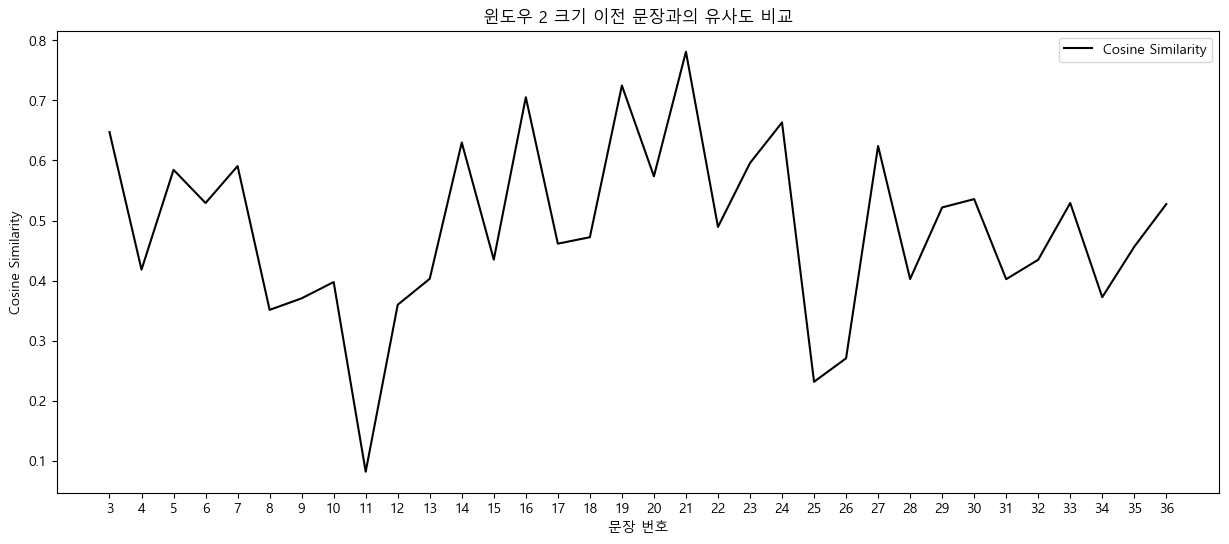

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(range(3, 37), similarities_2, linestyle='-', color='black', label='Cosine Similarity')
plt.xlabel('문장 번호')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.xticks(range(3, 37))
plt.title('윈도우 2 크기 이전 문장과의 유사도 비교')
plt.rc('font', family='MalgunGothic')
plt.show()

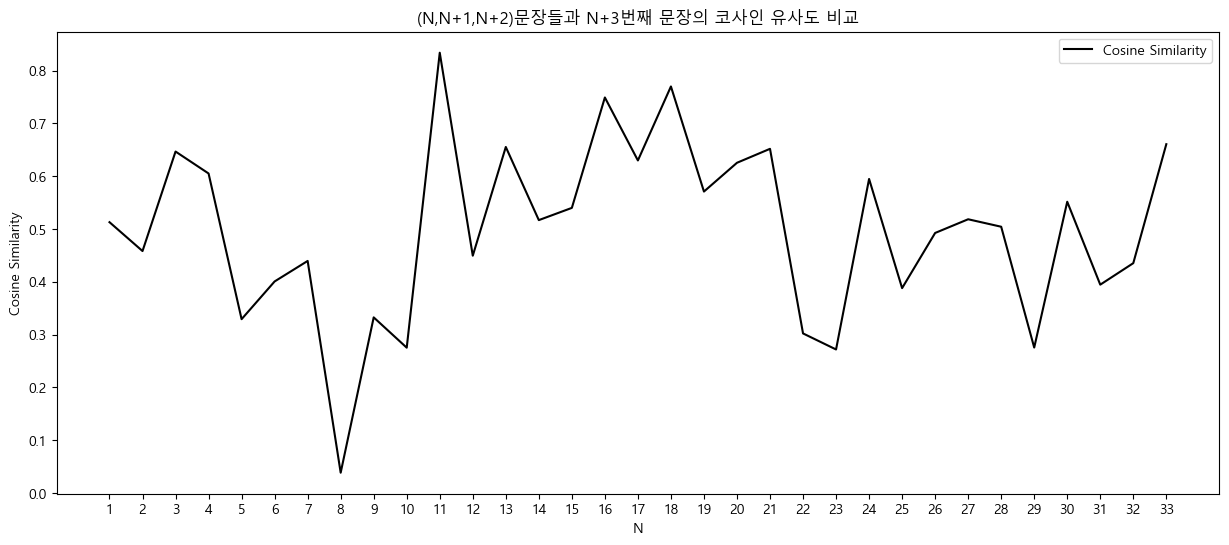

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 34), similarities_3, linestyle='-', color='black', label='Cosine Similarity')
plt.xlabel('N')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.xticks(range(1, 34))
plt.title('(N,N+1,N+2)문장들과 N+3번째 문장의 코사인 유사도 비교')
plt.rc('font', family='MalgunGothic')
plt.show()